In [9]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
import honi_he_lib

path = './img-he/'

he = honi_he_lib.HE(256)

img_A = cv.imread(path+'A.jpg')
img_B = cv.imread(path+'B.jpg')

### Histogram Equalization

In [2]:
# Histogram Equalization (honi_he_lib::mode-0)

he.setInput(img_A)
he.apply(mode=0)
img_A_0 = he.getOutput() #output image
hist_A_0 = he.s_pmf #output histogram
hist_A = he.r_pmf #original histogram

he.setInput(img_B)
he.apply(mode=0)
img_B_0 = he.getOutput()
hist_B_0 = he.s_pmf
hist_B = he.r_pmf

levels = he.levels #intensity levels

# Save
cv.imwrite(path+'img_A_0.jpg',img_A_0)
cv.imwrite(path+'img_B_0.jpg',img_B_0)
np.savetxt(path+'hist_A_0.csv',hist_A_0,delimiter=',')
np.savetxt(path+'hist_B_0.csv',hist_B_0,delimiter=',')
np.savetxt(path+'hist_A.csv',hist_A,delimiter=',')
np.savetxt(path+'hist_B.csv',hist_B,delimiter=',')
np.savetxt(path+'levels.csv',levels,delimiter=',')

Histogram-Equalization is being applied...
Histogram-Equalization is being applied...


In [ ]:
# Transformation Plot 
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots(1,3,sharex=False,sharey=False,figsize=(16,4))

ax[0].set_title(f"Histogram B (Original)", loc="center")
ax[0].bar(levels,hist_B,linewidth=2)
ax[0].set_xlabel('$p_r$',fontsize=12)
ax[0].set_ylabel('$p_r(r_k)$',fontsize=12)

ax[1].set_title(f"Transformation Function", loc="center")
ax[1].bar(levels,he.tr,linewidth=2,alpha=0.4,color='k')
ax[1].set_xlabel('$r_k$',fontsize=12)
ax[1].set_ylabel('$s_k$',fontsize=12)

ax[2].set_title(f"Histogram B (Equalized)", loc="center")
ax[2].bar(levels,hist_B_0,linewidth=2)
ax[2].set_xlabel('$p_s$',fontsize=12)
ax[2].set_ylabel('$p_s(s_k)$',fontsize=12)

### Local Histogram Equalization

In [3]:
# Local Histogram Equalization (honi_he_lib::mode-1)

he.setInput(img_A)
he.apply(mode=1,kernel_size=7)
img_A_1 = he.getOutput()
hist_A_1 = he.s_pmf

he.setInput(img_B)
he.apply(mode=1,kernel_size=7)
img_B_1 = he.getOutput()
hist_B_1 = he.s_pmf

# Save
cv.imwrite(path+'img_A_1.jpg',img_A_1)
cv.imwrite(path+'img_B_1.jpg',img_B_1)
np.savetxt(path+'hist_A_1.csv',hist_A_1,delimiter=',')
np.savetxt(path+'hist_B_1.csv',hist_B_1,delimiter=',')

Local Histogram-Equalization is being applied...


Local-HE: 100%|██████████| 536/536 [16:42<00:00,  1.87s/it]


Local Histogram-Equalization is being applied...


Local-HE: 100%|██████████| 394/394 [03:15<00:00,  2.01it/s]


### Histogram Specification

In [4]:
# Histogram Specification (honi_he_lib::mode-2)

he.setInput(img_A)
he.apply(mode=2,target_hist=hist_B)
img_A_2 = he.getOutput()
hist_A_2 = he.s_pmf

# Save
cv.imwrite(path+'img_A_2.jpg',img_A_2)
np.savetxt(path+'hist_A_2.csv',hist_A_2,delimiter=',')

Histogram Specification is being applied...


### Plot

Text(0, 0.5, 'count / total pixel number')

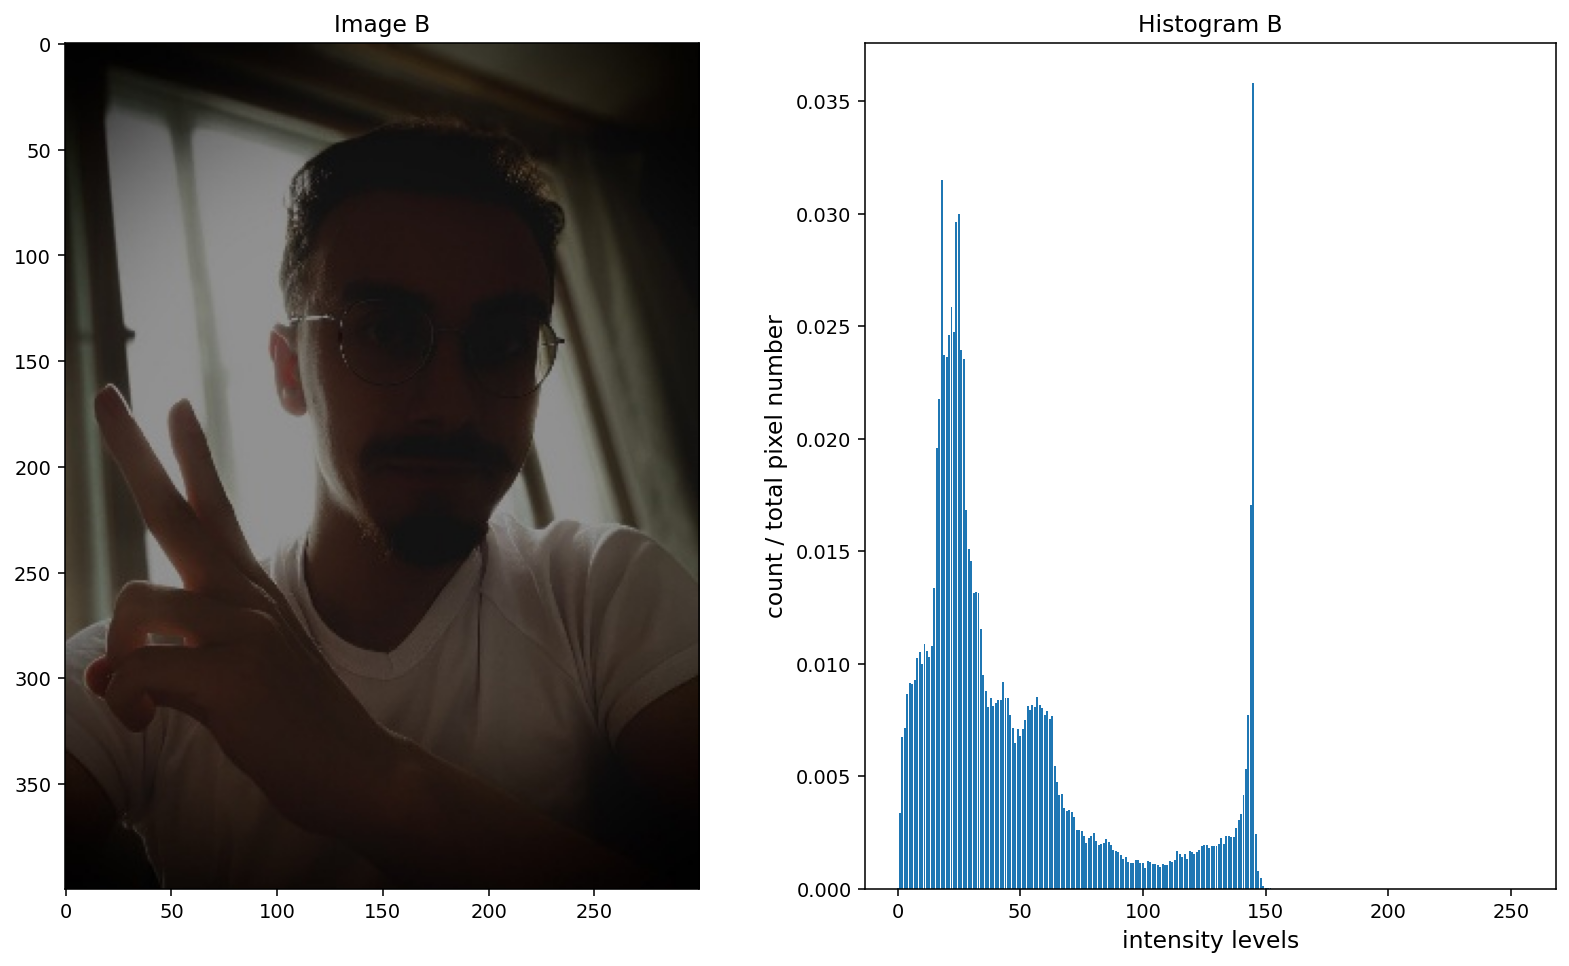

In [66]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140

fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(14,8))

ax[0].set_title(f"Image B", loc="center")
ax[0].imshow(cv.cvtColor(img_B,cv.COLOR_BGR2RGB))

ax[1].set_title(f"Histogram B", loc="center")
ax[1].bar(levels,hist_B,linewidth=2)
ax[1].set_xlabel('intensity levels',fontsize=12)
ax[1].set_ylabel('count / total pixel number',fontsize=12)

Text(0, 0.5, 'count / total pixel number')

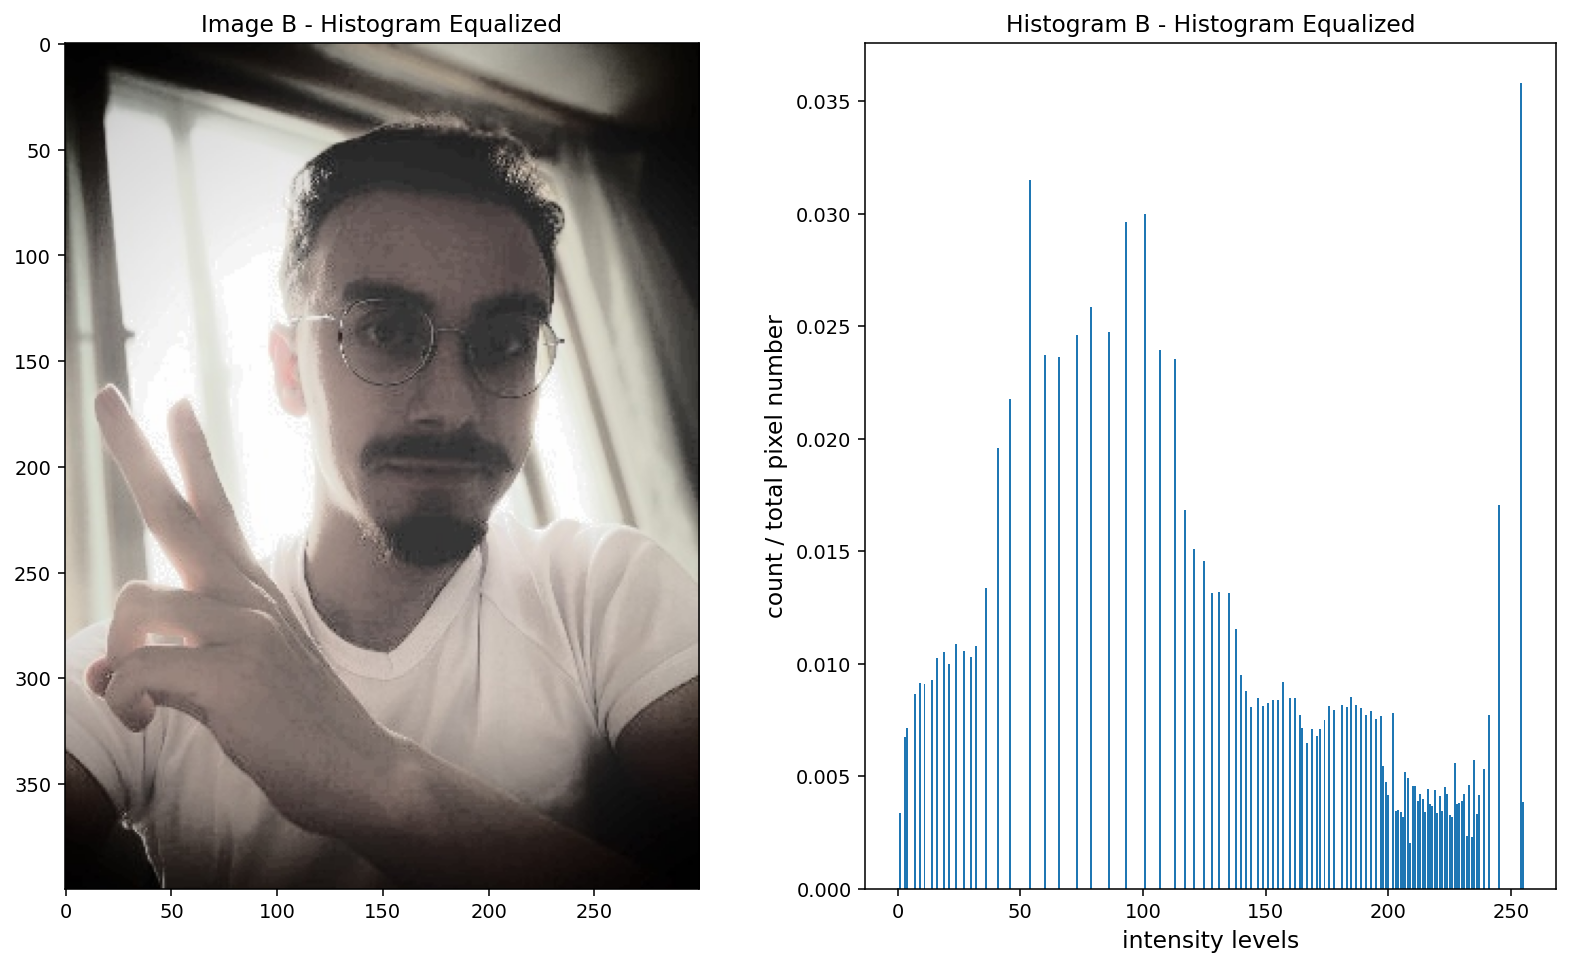

In [65]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140

fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(14,8))

ax[0].set_title(f"Image B - Histogram Equalized", loc="center")
ax[0].imshow(cv.cvtColor(img_B_0,cv.COLOR_BGR2RGB))

ax[1].set_title(f"Histogram B - Histogram Equalized", loc="center")
ax[1].bar(levels,hist_B_0,linewidth=2)
ax[1].set_xlabel('intensity levels',fontsize=12)
ax[1].set_ylabel('count / total pixel number',fontsize=12)

Text(0, 0.5, 'count / total pixel number')

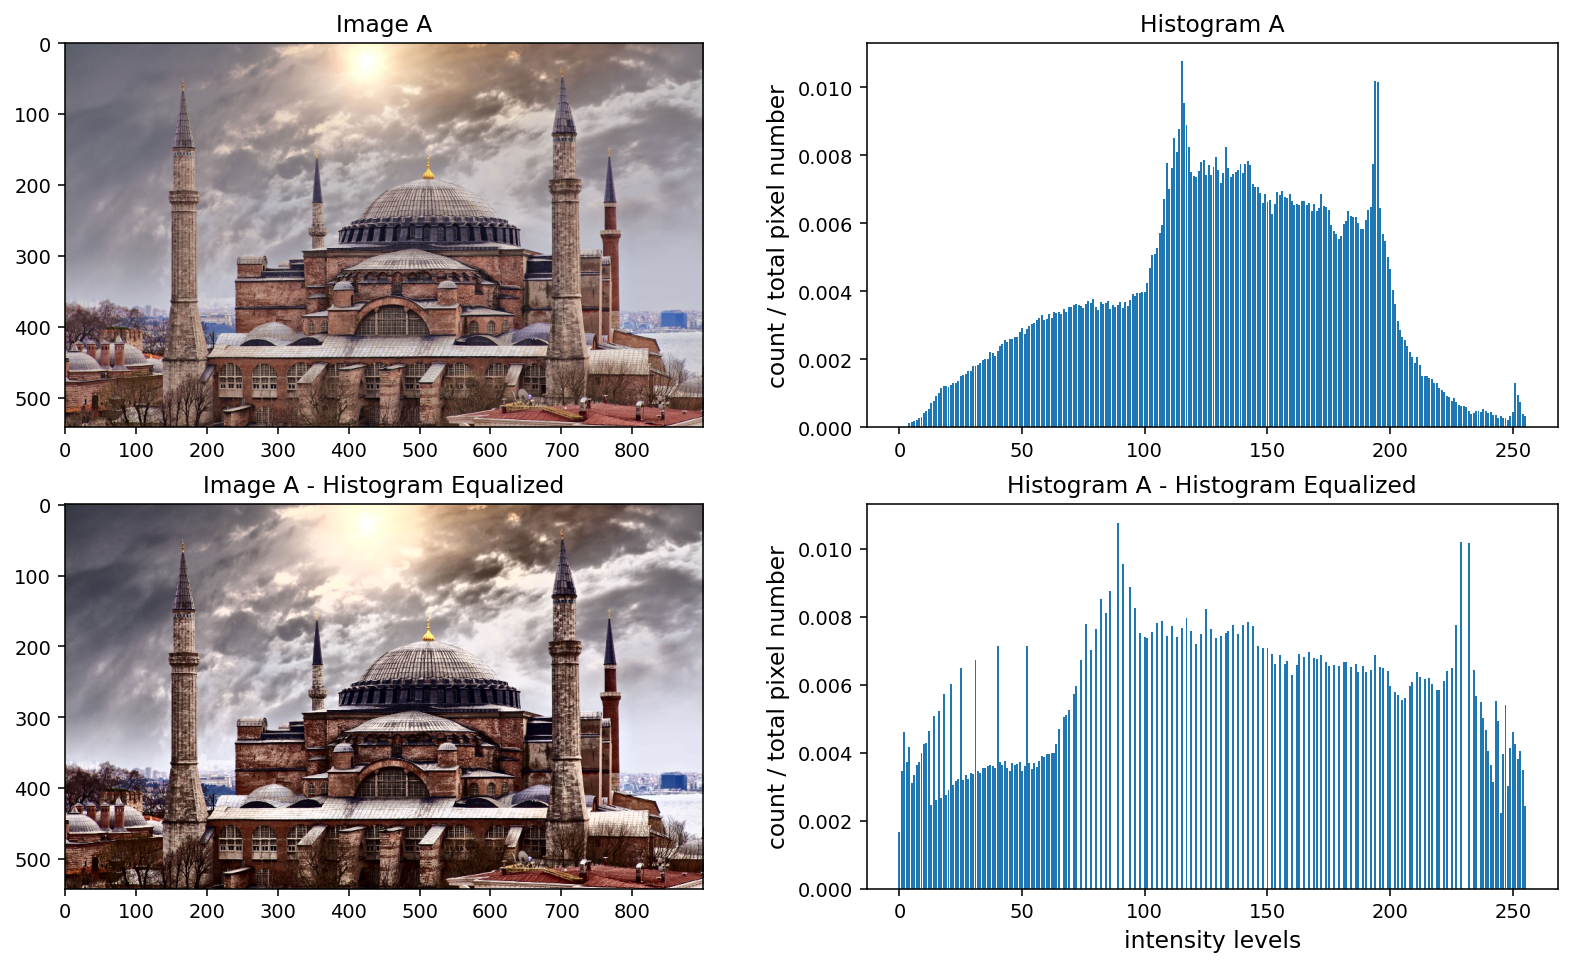

In [53]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140

fig, ax = plt.subplots(2,2,sharex=False,sharey=False,figsize=(14,8))

ax[0][0].set_title(f"Image A", loc="center")
ax[0][0].imshow(cv.cvtColor(img_A,cv.COLOR_BGR2RGB))

ax[0][1].set_title(f"Histogram A", loc="center")
ax[0][1].bar(levels,hist_A,linewidth=2)
# ax[0][1].set_xlabel('intensity levels',fontsize=12)
ax[0][1].set_ylabel('count / total pixel number',fontsize=12)

ax[1][0].set_title(f"Image A - Histogram Equalized", loc="center")
ax[1][0].imshow(cv.cvtColor(img_A_0,cv.COLOR_BGR2RGB))

ax[1][1].set_title(f"Histogram A - Histogram Equalized", loc="center")
ax[1][1].bar(levels,hist_A_0,linewidth=2)
ax[1][1].set_xlabel('intensity levels',fontsize=12)
ax[1][1].set_ylabel('count / total pixel number',fontsize=12)

Text(0, 0.5, 'count / total pixel number')

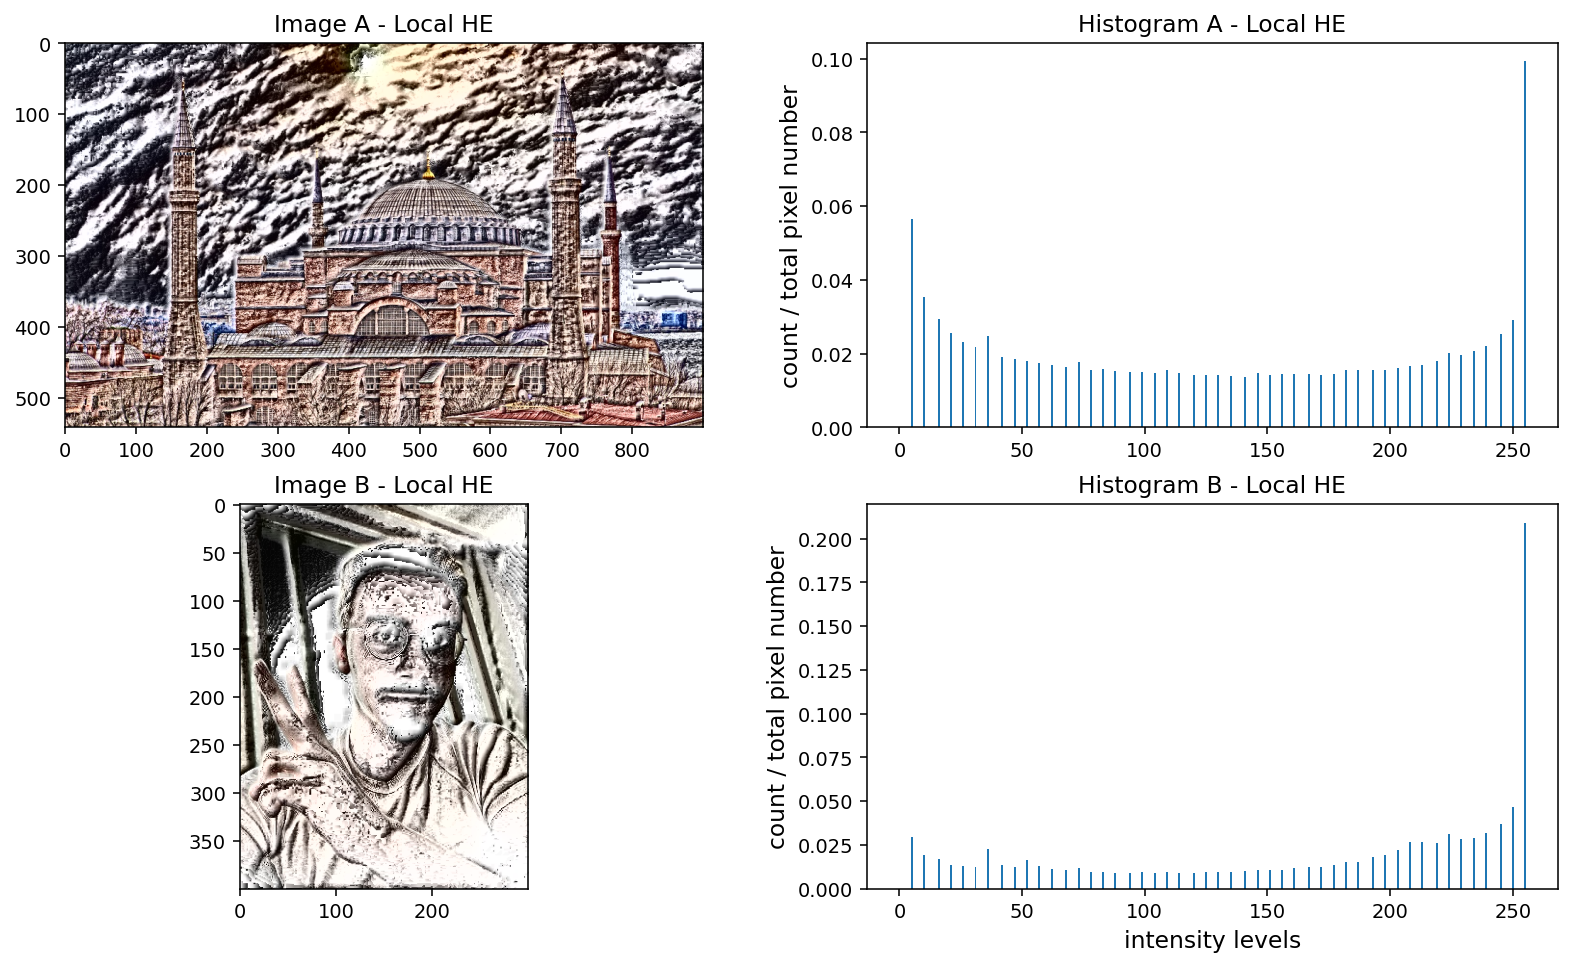

In [55]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140

fig, ax = plt.subplots(2,2,sharex=False,sharey=False,figsize=(14,8))

ax[0][0].set_title(f"Image A - Local HE", loc="center")
ax[0][0].imshow(cv.cvtColor(img_A_1,cv.COLOR_BGR2RGB))

ax[0][1].set_title(f"Histogram A - Local HE", loc="center")
ax[0][1].bar(levels,hist_A_1,linewidth=2)
# ax[0][1].set_xlabel('intensity levels',fontsize=12)
ax[0][1].set_ylabel('count / total pixel number',fontsize=12)

ax[1][0].set_title(f"Image B - Local HE", loc="center")
ax[1][0].imshow(cv.cvtColor(img_B_1,cv.COLOR_BGR2RGB))

ax[1][1].set_title(f"Histogram B - Local HE", loc="center")
ax[1][1].bar(levels,hist_B_1,linewidth=2)
ax[1][1].set_xlabel('intensity levels',fontsize=12)
ax[1][1].set_ylabel('count / total pixel number',fontsize=12)

Text(0, 0.5, 'count / total pixel number')

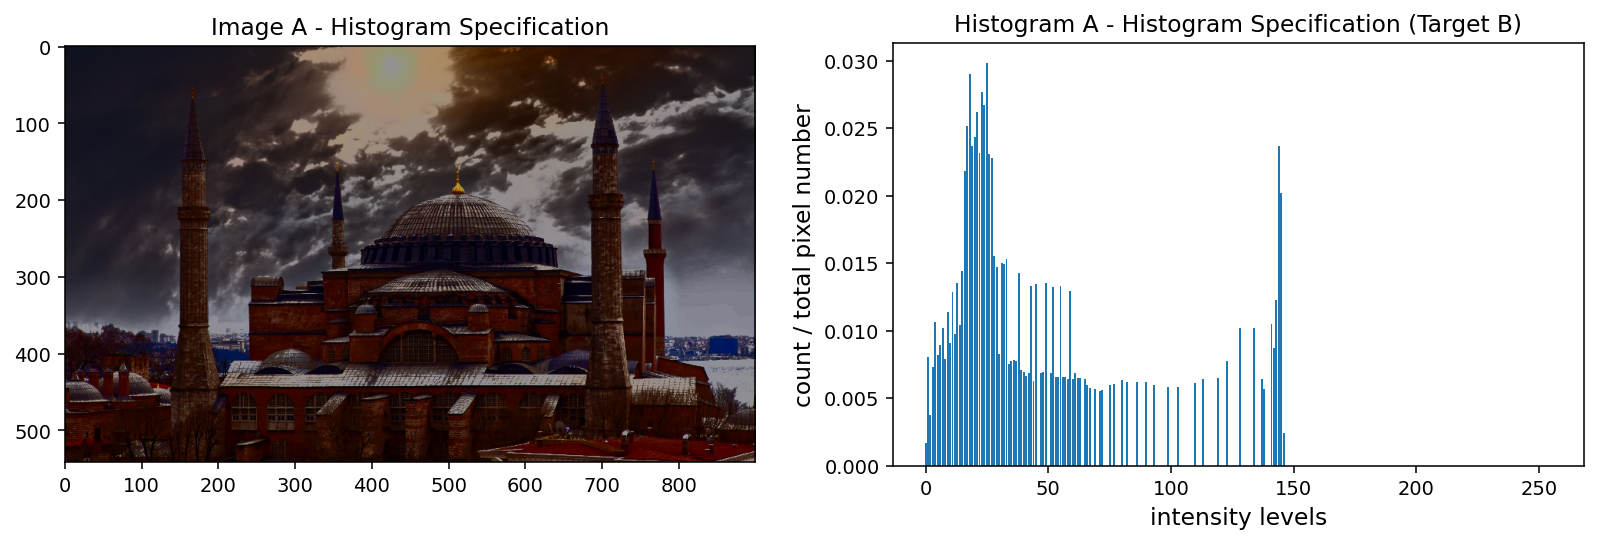

In [67]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 140

fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(14,4))

ax[0].set_title(f"Image A - Histogram Specification", loc="center")
ax[0].imshow(cv.cvtColor(img_A_2,cv.COLOR_BGR2RGB))

ax[1].set_title(f"Histogram A - Histogram Specification (Target B)", loc="center")
ax[1].bar(levels,hist_A_2,linewidth=2)
ax[1].set_xlabel('intensity levels',fontsize=12)
ax[1].set_ylabel('count / total pixel number',fontsize=12)